In [62]:
import pandas as pd

df = pd.read_csv("archive2/captions.txt")
processed_dict = {}
caption_list = []

for index, row in df.iterrows():
    if row['image'] not in processed_dict:
        processed_dict[row['image']] = []
    processed_dict[row['image']].append(row['caption'])
    caption_list.append(row['caption'])

print(processed_dict['1001773457_577c3a7d70.jpg'])

['A black dog and a spotted dog are fighting', 'A black dog and a tri-colored dog playing with each other on the road .', 'A black dog and a white dog with brown spots are staring at each other in the street .', 'Two dogs of different breeds looking at each other on the road .', 'Two dogs on pavement moving toward each other .']


In [176]:
from transformers import CLIPModel, CLIPProcessor
import torch

# Choose a suitable CLIP model, e.g., "openai/clip-vit-base-patch32"
model_name = "openai/clip-vit-base-patch32"
dict_caption= {}

model = CLIPModel.from_pretrained(model_name)
processor = CLIPProcessor.from_pretrained(model_name)
for caption in caption_list:
    tokenized_captions = processor(text=caption, return_tensors="pt")
    with torch.no_grad():
        text_features = model.get_text_features(**tokenized_captions)
    dict_caption[caption] = text_features



KeyboardInterrupt: 

In [83]:
text_features

tensor([[-6.0001e-02, -3.0608e-01, -4.0944e-01, -9.1852e-02, -1.1983e-01,
          1.3867e-01,  1.2455e-01, -2.8868e-01, -4.3059e-01,  8.9705e-02,
          4.8985e-01, -5.5727e-02,  3.2770e-01, -1.8525e-01,  2.1553e-01,
          2.6750e-01, -8.2252e-01, -3.0457e-01, -2.2145e-02,  1.7581e-01,
          7.0879e-02,  6.9489e-02,  1.3612e-01, -9.6793e-02,  1.2971e-01,
          3.5344e-01,  6.1508e-02,  5.3775e-01,  1.0955e-01, -3.1116e-01,
          3.2914e-01,  1.0445e-01, -6.0755e-03, -9.0483e-02, -2.3532e-01,
         -2.0467e-01,  9.1714e-02, -4.7168e-02,  1.9663e-01,  1.3087e-01,
         -1.1135e-01,  2.8945e-01, -5.8185e-01,  4.3856e-01,  1.8905e-01,
          1.9448e-01,  3.5740e-02, -2.3247e-01, -5.1189e-01, -2.2916e-01,
         -1.9623e-03,  1.2623e-01, -2.1701e-02, -4.1747e-01, -4.1072e-02,
          7.8327e-02,  1.5769e-01, -1.9652e-01,  1.5453e-01, -2.4897e-02,
          5.2627e-01,  4.8795e-01, -1.1945e-01,  1.1179e-02, -2.3492e-01,
          9.9766e-02, -8.0123e-02,  5.

In [87]:
max = 0 
val =""
for key , value in dict_caption.items():
    if(len(key) > max):
        max = len(key)
        val = key
print(max)
print(val)       

199
An African-American man wearing a green sweatshirt and blue vest is holding up 2 dollar bills in front of his face , while standing on a busy sidewalk in front of a group of men playing instruments .


In [100]:
for key , value in dict_caption.items():
    print(key)
    print(value.view(-1).tolist())
    break


A child in a pink dress is climbing up a set of stairs in an entry way .
[-0.06000072509050369, -0.30607813596725464, -0.4094424545764923, -0.09185180813074112, -0.1198284924030304, 0.13867276906967163, 0.12454593181610107, -0.28867921233177185, -0.4305877983570099, 0.08970452100038528, 0.4898538887500763, -0.05572669953107834, 0.32769620418548584, -0.18525481224060059, 0.21553398668766022, 0.2674970328807831, -0.8225163221359253, -0.30457139015197754, -0.022144999355077744, 0.17580628395080566, 0.07087945938110352, 0.06948943436145782, 0.136118546128273, -0.09679318219423294, 0.12970653176307678, 0.3534436821937561, 0.061508193612098694, 0.537753701210022, 0.10954813659191132, -0.31116029620170593, 0.32913637161254883, 0.10444898903369904, -0.0060754865407943726, -0.09048290550708771, -0.23532184958457947, -0.2046683132648468, 0.09171423316001892, -0.0471675843000412, 0.19663091003894806, 0.1308743953704834, -0.11135129630565643, 0.2894479036331177, -0.5818505883216858, 0.438556730747

In [85]:
len(dict_caption)

40201

In [93]:

# Important : run this command only once 
# Before running this command, make sure you have installed psycopg2
# you should also have a database named embeddings in your postgresql 
# default username is postgres and password is empty string
# if you have changed the username and password, change it in the code below
# if you have changed the database name, change it in the code below else you can crete a databae using the command create database embeddings


import psycopg2
from psycopg2 import Error

try:
    #connect to database clip 
    connection = psycopg2.connect(user = "ayuranjan",
                                    password = "ayuranjan",
                                    host = "localhost",
                                    port = "5432",
                                    database = "embeddings")
    cursor = connection.cursor()
    cursor.execute("CREATE EXTENSION IF NOT EXISTS vector")
    print("Extension created successfully")
    connection.commit()
    cursor.execute("CREATE TABLE IF NOT EXISTS  clip_captions(caption VARCHAR(300) PRIMARY KEY, caption_embedding vector(512))")
    print("Table created successfully")
    connection.commit()

except (Exception, psycopg2.Error) as error :
    print ("Error while connecting to PostgreSQL", error)
finally:
        #closing database connection.
        if(connection):
            cursor.close()
            connection.close()
            print("PostgreSQL connection is closed")


Extension created successfully
Table created successfully
PostgreSQL connection is closed


In [102]:
#insert image embeddings into table

try:
    connection = psycopg2.connect(user = "ayuranjan",
                                    password = "ayuranjan",
                                    host = "localhost",
                                    port = "5432",
                                    database = "embeddings")
    cursor = connection.cursor()
    for key, value in dict_caption.items():
        cursor.execute("INSERT INTO clip_captions (caption, caption_embedding) VALUES (%s, %s)", (key, value.view(-1).tolist()))    
    connection.commit()
    cursor.execute("SELECT COUNT(*) FROM clip_captions")
    record = cursor.fetchone()
    print(str(record[0]) + " Record inserted successfully into table")
    
except (Exception, psycopg2.Error) as error :
    print ("Error while connecting to PostgreSQL", error)
finally:
        #closing database connection.
        if(connection):
            cursor.close()
            connection.close()
            print("PostgreSQL connection is closed")

            


40201 Record inserted successfully into table
PostgreSQL connection is closed


In [104]:
# find top 10 similar captions for a given caption

import psycopg2
from psycopg2 import Error
import torch
import numpy as np

similar_caption ={}

try:
    connection = psycopg2.connect(user = "ayuranjan",
                                    password = "",
                                    host = "localhost",
                                    port = "5432",
                                    database = "embeddings")
    cursor = connection.cursor()
    for key, value in dict_caption.items():
        cursor.execute("SELECT caption FROM clip_captions ORDER BY caption_embedding <-> %s::vector  LIMIT 10;", (value.view(-1).tolist(),))
        record = cursor.fetchall()
        similar_caption[key] = record 
    
    
except (Exception, psycopg2.Error) as error :
    print ("Error while connecting to PostgreSQL", error)
finally:
        #closing database connection.
        if(connection):
            cursor.close()
            connection.close()
            print("PostgreSQL connection is closed")

PostgreSQL connection is closed


In [117]:
similar_caption

('A little girl in a pink dress going into a wooden cabin .',)

In [107]:
# print top 10 similar captions for a given caption
#store the dictioanry in a json file

import json

with open('similar_caption.json', 'w') as f:
    json.dump(similar_caption, f)


In [118]:
# get the dictionary from the json file 
with open('similar_caption.json') as f:
    similar_captions = json.load(f)


In [120]:
len(similar_captions)

40201

In [63]:
image_name = '1000268201_693b08cb0e.jpg'
print(processed_dict[image_name])

['A child in a pink dress is climbing up a set of stairs in an entry way .', 'A girl going into a wooden building .', 'A little girl climbing into a wooden playhouse .', 'A little girl climbing the stairs to her playhouse .', 'A little girl in a pink dress going into a wooden cabin .']


In [153]:
# get all the similar captions of the caption 
# captions will be a set 

captions =[]

for caption in processed_dict[image_name]:
    scs = similar_captions[caption]
    for sc in scs:
        captions.append(sc[0])

In [159]:
len(captions)
unique_captions = list(set(captions))
print(len(unique_captions))

38


In [160]:
unique_captions

['A young girl jumps off her swing in front of building .',
 'A girl climbs the stairway of a playground as arms reach for her .',
 'A young girl slides down a bar in a play structure .',
 'A child in a pink dress is climbing up a set of stairs in an entry way .',
 'Two young kids walk up some stairs .',
 'A girl twirls in a pink dress .',
 'A small child in a pink hoodie ascending tall stairs outdoors .',
 'A girl in pink and purple is climbing a ladder .',
 'A child is standing beside a banister on a red carpeted stair .',
 'A little girl climbs a fence .',
 'A little girl dancing in a pink and green dress .',
 'A young girl in a pink dress stands on a sidewalk .',
 'A baby girl wearing a pink jacket climbs wooden steps .',
 'A young boy climbing in a playhouse',
 'A woman leaning on a doorway to a store .',
 'Kid riding skateboard down the stairs .',
 'A little girl climbing at a playground .',
 'A little girl climbing the stairs to her playhouse .',
 'A young girl walks quickly out

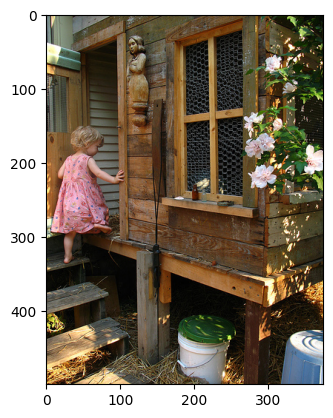

In [137]:
#open the image file  from image path and display it
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image_path = 'archive2/Images/1000268201_693b08cb0e.jpg'
img = mpimg.imread(image_path)
imgplot = plt.imshow(img)
plt.show()




In [34]:
type(caption_list[0])

str

In [173]:
from PIL import Image
import torch

from transformers import CLIPProcessor, CLIPModel,AutoTokenizer

device = "cuda" if torch.cuda.is_available() else \
         ("mps" if torch.backends.mps.is_available() else "cpu" ) 
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32").to(device)
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")
tokenizer = AutoTokenizer.from_pretrained("openai/clip-vit-base-patch32")
image_name = '1000268201_693b08cb0e.jpg'
image_path = 'archive2/Images/1000268201_693b08cb0e.jpg'
image = Image.open(image_path)
# image = processor(images=image, return_tensors="pt").to(device)
# tokenized_captions = tokenizer(processed_dict[image_name], padding=True)
inputs = processor(text=processed_dict[image_name], images=image, return_tensors="pt", padding=True).to(device)
outputs = model(**inputs)
logits_per_image = outputs.logits_per_image
probs = logits_per_image.softmax(dim=1) 
probs


tensor([[0.0809, 0.0028, 0.1886, 0.3559, 0.3719]], device='mps:0',
       grad_fn=<SoftmaxBackward0>)

In [35]:
print(len(caption_list))

40455


In [161]:
from PIL import Image
import torch

from transformers import CLIPProcessor, CLIPModel,AutoTokenizer

device = "cuda" if torch.cuda.is_available() else \
         ("mps" if torch.backends.mps.is_available() else "cpu" ) 
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32").to(device)
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")
tokenizer = AutoTokenizer.from_pretrained("openai/clip-vit-base-patch32")
image_name = '1000268201_693b08cb0e.jpg'
image_path = 'archive2/Images/1000268201_693b08cb0e.jpg'
image = Image.open(image_path)
# image = processor(images=image, return_tensors="pt").to(device)
# tokenized_captions = tokenizer(processed_dict[image_name], padding=True)
inputs = processor(text=unique_captions, images=image, return_tensors="pt", padding=True).to(device)

outputs = model(**inputs)

In [162]:
logits_per_image = outputs.logits_per_image  # this is the image-text similarity score

In [163]:
print(logits_per_image)

tensor([[26.5388, 28.0686, 27.2001, 33.0782, 27.2136, 23.8201, 29.9443, 28.2610,
         28.6072, 29.6782, 24.3526, 24.0030, 33.2466, 29.9848, 25.6872, 21.9838,
         25.9960, 34.5598, 27.1373, 28.9736, 26.8031, 34.6038, 27.4620, 23.1322,
         25.3394, 22.3431, 29.7297, 28.0911, 24.8384, 30.0229, 29.4563, 33.9247,
         23.1647, 26.0409, 29.9569, 28.8831, 26.2162, 20.7746]],
       device='mps:0', grad_fn=<TBackward0>)


In [164]:
probs = logits_per_image.softmax(dim=1)  # we can take the softmax to get the label probabilities

In [165]:

print(probs)

tensor([[1.0419e-04, 4.8106e-04, 2.0184e-04, 7.2086e-02, 2.0459e-04, 6.8720e-06,
         3.1389e-03, 5.8311e-04, 8.2433e-04, 2.4057e-03, 1.1704e-05, 8.2516e-06,
         8.5304e-02, 3.2690e-03, 4.4460e-05, 1.0955e-06, 6.0542e-05, 3.1718e-01,
         1.8955e-04, 1.1891e-03, 1.3570e-04, 3.3144e-01, 2.6228e-04, 3.4541e-06,
         3.1399e-05, 1.5691e-06, 2.5329e-03, 4.9199e-04, 1.9025e-05, 3.3959e-03,
         1.9269e-03, 1.6806e-01, 3.5684e-06, 6.3324e-05, 3.1788e-03, 1.0863e-03,
         7.5456e-05, 3.2693e-07]], device='mps:0', grad_fn=<SoftmaxBackward0>)


In [166]:
top_indices = torch.topk(probs, k=10).indices
top_indices

tensor([[21, 17, 31, 12,  3, 29, 13, 34,  6, 26]], device='mps:0')

In [167]:
for index in top_indices[0]:
    print(unique_captions[index])

A little girl in a pink dress going into a wooden cabin .
A little girl climbing the stairs to her playhouse .
A little girl climbing into a wooden playhouse .
A baby girl wearing a pink jacket climbs wooden steps .
A child in a pink dress is climbing up a set of stairs in an entry way .
A little girl is climbing a ladder .
A young boy climbing in a playhouse
A small child in a pink sweater begins to climb a concrete staircase .
A small child in a pink hoodie ascending tall stairs outdoors .
A girl going into a wooden building .


In [41]:
image_name = '1000268201_693b08cb0e.jpg'
print(processed_dict[image_name])

['A child in a pink dress is climbing up a set of stairs in an entry way .', 'A girl going into a wooden building .', 'A little girl climbing into a wooden playhouse .', 'A little girl climbing the stairs to her playhouse .', 'A little girl in a pink dress going into a wooden cabin .']


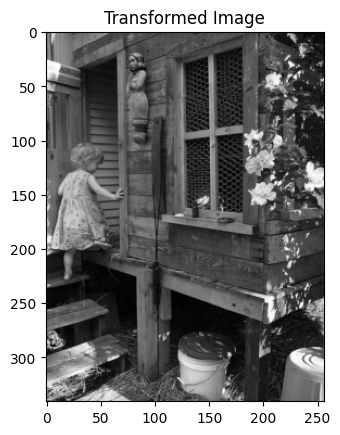

In [174]:
#apply transformation to the image  that still preserves the contents and predict caption on that tranformed image 
from torchvision import transforms
import torchvision.transforms.functional as TF
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.ToTensor(),
    transforms.RandomGrayscale(p=0.7),
])
image_path = 'archive2/Images/1000268201_693b08cb0e.jpg'
image = Image.open(image_path)
image = transform(image)
pil_image = TF.to_pil_image(image)

# Display the image using matplotlib
plt.imshow(pil_image)
plt.title("Transformed Image")  # Optional: Add a title
plt.show()


In [175]:
device = "cuda" if torch.cuda.is_available() else \
         ("mps" if torch.backends.mps.is_available() else "cpu" ) 
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32").to(device)
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")
tokenizer = AutoTokenizer.from_pretrained("openai/clip-vit-base-patch32")
image = Image.open(image_path)    
inputs = processor(text= processed_dict[image_name], images=pil_image, return_tensors="pt", padding=True).to(device)
outputs = model(**inputs)
logits_per_image = outputs.logits_per_image  # this is the image-text similarity score
probs = logits_per_image.softmax(dim=1)  # we can take the softmax to get the label probabilities
print(probs)


tensor([[0.0277, 0.0110, 0.4669, 0.3725, 0.1219]], device='mps:0',
       grad_fn=<SoftmaxBackward0>)


In [169]:
device = "cuda" if torch.cuda.is_available() else \
         ("mps" if torch.backends.mps.is_available() else "cpu" ) 
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32").to(device)
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")
tokenizer = AutoTokenizer.from_pretrained("openai/clip-vit-base-patch32")
image = Image.open(image_path)    
inputs = processor(text=unique_captions, images=pil_image, return_tensors="pt", padding=True).to(device)

outputs = model(**inputs)

In [170]:

logits_per_image = outputs.logits_per_image  # this is the image-text similarity score
probs = logits_per_image.softmax(dim=1)  # we can take the softmax to get the label probabilities
print(probs)

tensor([[3.6122e-04, 4.1351e-03, 5.8072e-04, 2.4413e-02, 6.8644e-04, 1.7893e-06,
         8.1801e-04, 8.5927e-05, 6.2053e-03, 1.8989e-02, 1.6240e-06, 2.7489e-05,
         3.1017e-02, 2.5097e-02, 5.9239e-03, 7.1505e-06, 4.1126e-04, 3.2824e-01,
         4.5067e-04, 3.2602e-03, 2.1113e-04, 1.0744e-01, 5.0177e-04, 1.2730e-06,
         4.1158e-06, 1.2181e-04, 9.6874e-03, 8.0446e-04, 5.2144e-06, 3.5577e-03,
         3.4333e-03, 4.1152e-01, 3.5409e-07, 1.1736e-04, 3.5655e-03, 8.1559e-03,
         1.4928e-04, 5.3650e-06]], device='mps:0', grad_fn=<SoftmaxBackward0>)


In [171]:
top_indices = torch.topk(probs, k=10).indices
top_indices 
[21, 17, 31, 12,  3, 29, 13, 34,  6, 26]

tensor([[31, 17, 21, 12, 13,  3,  9, 26, 35,  8]], device='mps:0')

In [172]:
for index in top_indices[0]:
    print(unique_captions[index])

A little girl climbing into a wooden playhouse .
A little girl climbing the stairs to her playhouse .
A little girl in a pink dress going into a wooden cabin .
A baby girl wearing a pink jacket climbs wooden steps .
A young boy climbing in a playhouse
A child in a pink dress is climbing up a set of stairs in an entry way .
A little girl climbs a fence .
A girl going into a wooden building .
A little girl laughs while playing in a play house .
A child is standing beside a banister on a red carpeted stair .


In [ ]:
for index in top_indices[0]:


A little girl in a pink dress going into a wooden cabin .
A little girl climbing the stairs to her playhouse .
A little girl climbing into a wooden playhouse .
A baby girl wearing a pink jacket climbs wooden steps .
A child in a pink dress is climbing up a set of stairs in an entry way .
A little girl is climbing a ladder .
A young boy climbing in a playhouse
A small child in a pink sweater begins to climb a concrete staircase .
A small child in a pink hoodie ascending tall stairs outdoors .
A girl going into a wooden building .


In [9]:
import transformers
import torch
print(transformers.__version__)
print(torch.__version__)

4.37.0
2.1.1
